In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import timeline_drawer
from datetime import datetime
import time
# transpile
from qiskit.transpiler import InstructionDurations, PassManager
from qiskit.transpiler.passes import DynamicalDecoupling, Unroller, ALAPSchedule, LookaheadSwap, BasicSwap
#RB
import numpy as np
from qiskit_experiments.library import randomized_benchmarking as rb
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
from qiskit_experiments.library.randomized_benchmarking import RBUtils

#local로 안받으려고 바꿈.
from rb_experiment_dd import StandardRB_dd

from qiskit_experiments.library import StandardRB, InterleavedRB
import qiskit.circuit.library as circuits
from qiskit.circuit import Delay, Instruction
from qiskit.circuit.library.standard_gates import RXXGate, RZZGate, RZXGate, XGate, SXGate, IGate, CCXGate, SGate, CXGate
#from qiskit_experiments.library.randomized_benchmarking.double_interleaved_rb_experiment import DoubleI
%matplotlib inline

In [2]:
IBMQ.load_account()
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='snu', project='snu-students')>]

In [3]:
#from qiskit import IBMQ
#IBMQ.save_account(token='1fa943879509be3fdff89e627f421e2db0f3dd381d3858e3fa173593ebd3d8a7ebe9be59de6f11f769897a25d32fcf3fe4cc0f3568d8565d9214773d6e1757b9', hub='ibm-q-skku', group='snu', project='snu-students', overwrite=True)
#provider=IBMQ.enable_account(<1fa943879509be3fdff89e627f421e2db0f3dd381d3858e3fa173593ebd3d8a7ebe9be59de6f11f769897a25d32fcf3fe4cc0f3568d8565d9214773d6e1757b9>)

In [4]:
provider=IBMQ.providers()[1]
backend=provider.get_backend('ibmq_jakarta')
properties=backend.properties()


#provider=IBMQ.providers()[2]
#provider = IBMQ.get_provider(hub='ibm-q-community', group='qamp', project='spring-22-17')
#backend=provider.backend.ibmq_lima
#backend = provider.get_backend('ibmq_lima')

# get the basic feautures including qubit number of the backend.
config = backend.configuration()
backend_job_limit=backend.job_limit()

print("{0} is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}.{6} are the list of connected qubits."
      "{7} can handle maximum {8} circuits(experiments) per job."
      "Maximum number of active job i can have on it (cocurrent jobs that a user is able to submit to a backend) is {9}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates,
                config.coupling_map,
               config.backend_name,
               config.max_experiments,
               backend_job_limit.maximum_jobs))

ibmq_jakarta is on version 1.0.34. It has 7 qubits. It supports OpenPulse programs. The basis gates supported on this device are ['id', 'rz', 'sx', 'x', 'cx', 'reset'].[[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 5], [4, 5], [5, 3], [5, 4], [5, 6], [6, 5]] are the list of connected qubits.ibmq_jakarta can handle maximum 300 circuits(experiments) per job.Maximum number of active job i can have on it (cocurrent jobs that a user is able to submit to a backend) is None.


In [5]:
lengths = np.arange(1, 20, 3)
num_samples = 3
seed = 1010
qubits = [0,1,2]
print(backend)
print(datetime.today())

# Run an RB experiment on qubit 0
exp1 = StandardRB_dd(qubits, lengths, num_samples=num_samples, seed=seed,dd_sequence=[XGate(),XGate()])

ibmq_jakarta
2022-06-28 09:40:15.722523


ibmq_jakarta
2022-06-28 10:34:32.880422


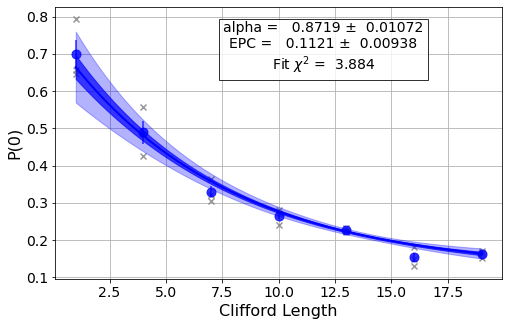

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6270551589914634, 0.8718728826707608, 0.11757641004609076]
- χ²: 3.8835847165097253
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.872+/-0.011
- χ²: 3.8835847165097253
- quality: bad
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.112+/-0.009
- χ²: 3.8835847165097253
- quality: bad
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False


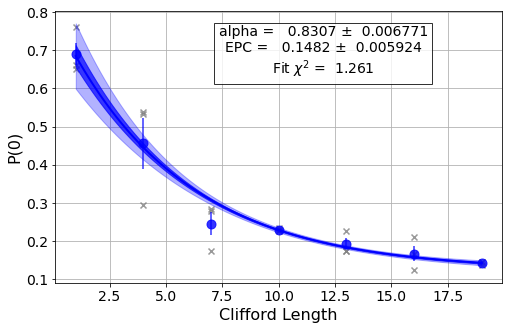

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6777976759593821, 0.8306516100211401, 0.12208601227811096]
- χ²: 1.2612473982941328
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.831+/-0.007
- χ²: 1.2612473982941328
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.148+/-0.006
- χ²: 1.2612473982941328
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False


In [12]:
lengths = np.arange(1, 20, 3)
num_samples = 3
seed = 1010
qubits = [0,1,2]
print(backend)
print(datetime.today())

# Run an RB experiment on qubit 0
#exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

exp2=StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend).block_for_results()
results2 = expdata2.analysis_results()

# View result data
display(expdata2.figure(0))
for result in results2:
    print(result)

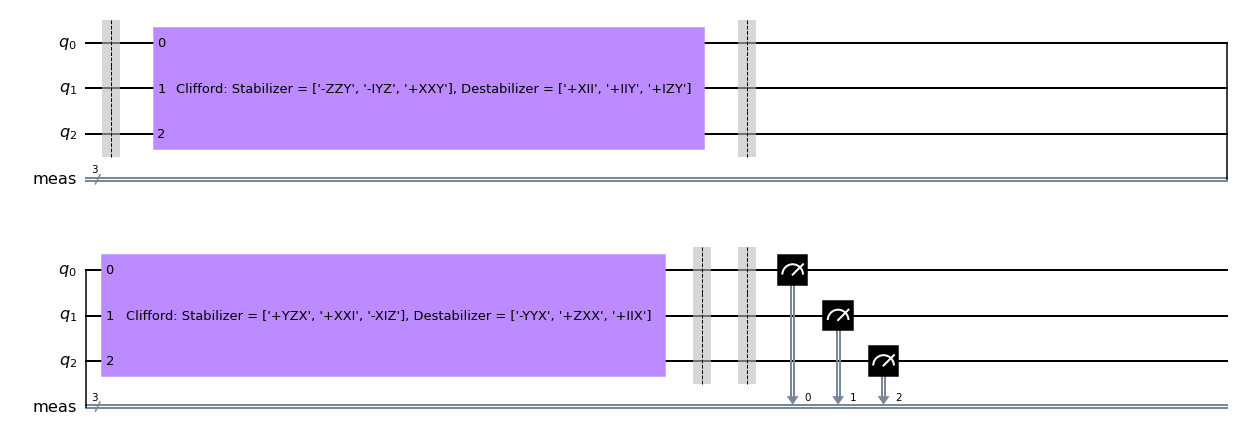

In [19]:
exp1.circuits()[0].draw('mpl')

7
(100, 41)


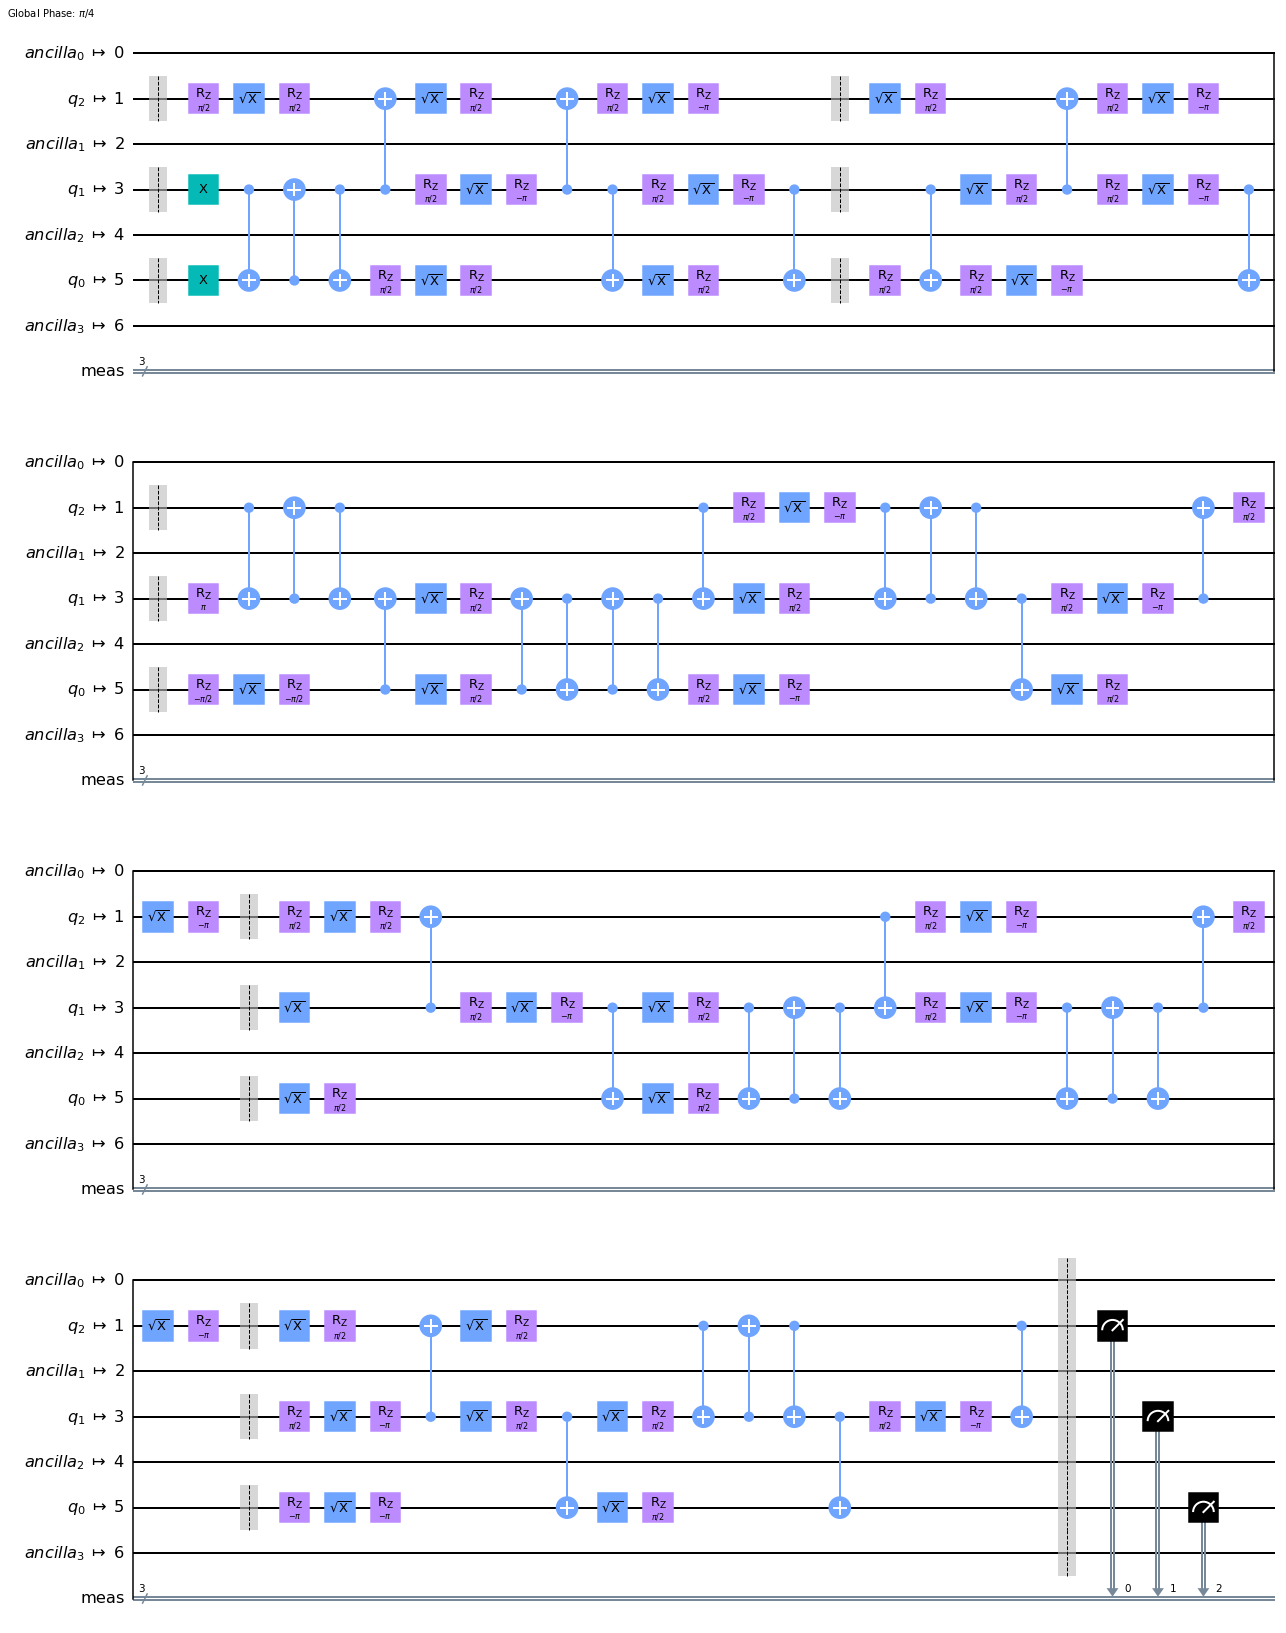

In [46]:
print(len(exp1.circuits()[1].count_ops()))
print(number_of_gates(transpile(exp1.circuits()[1],backend)))
transpile(exp1.circuits()[1],backend).draw('mpl')

7
(100, 41)


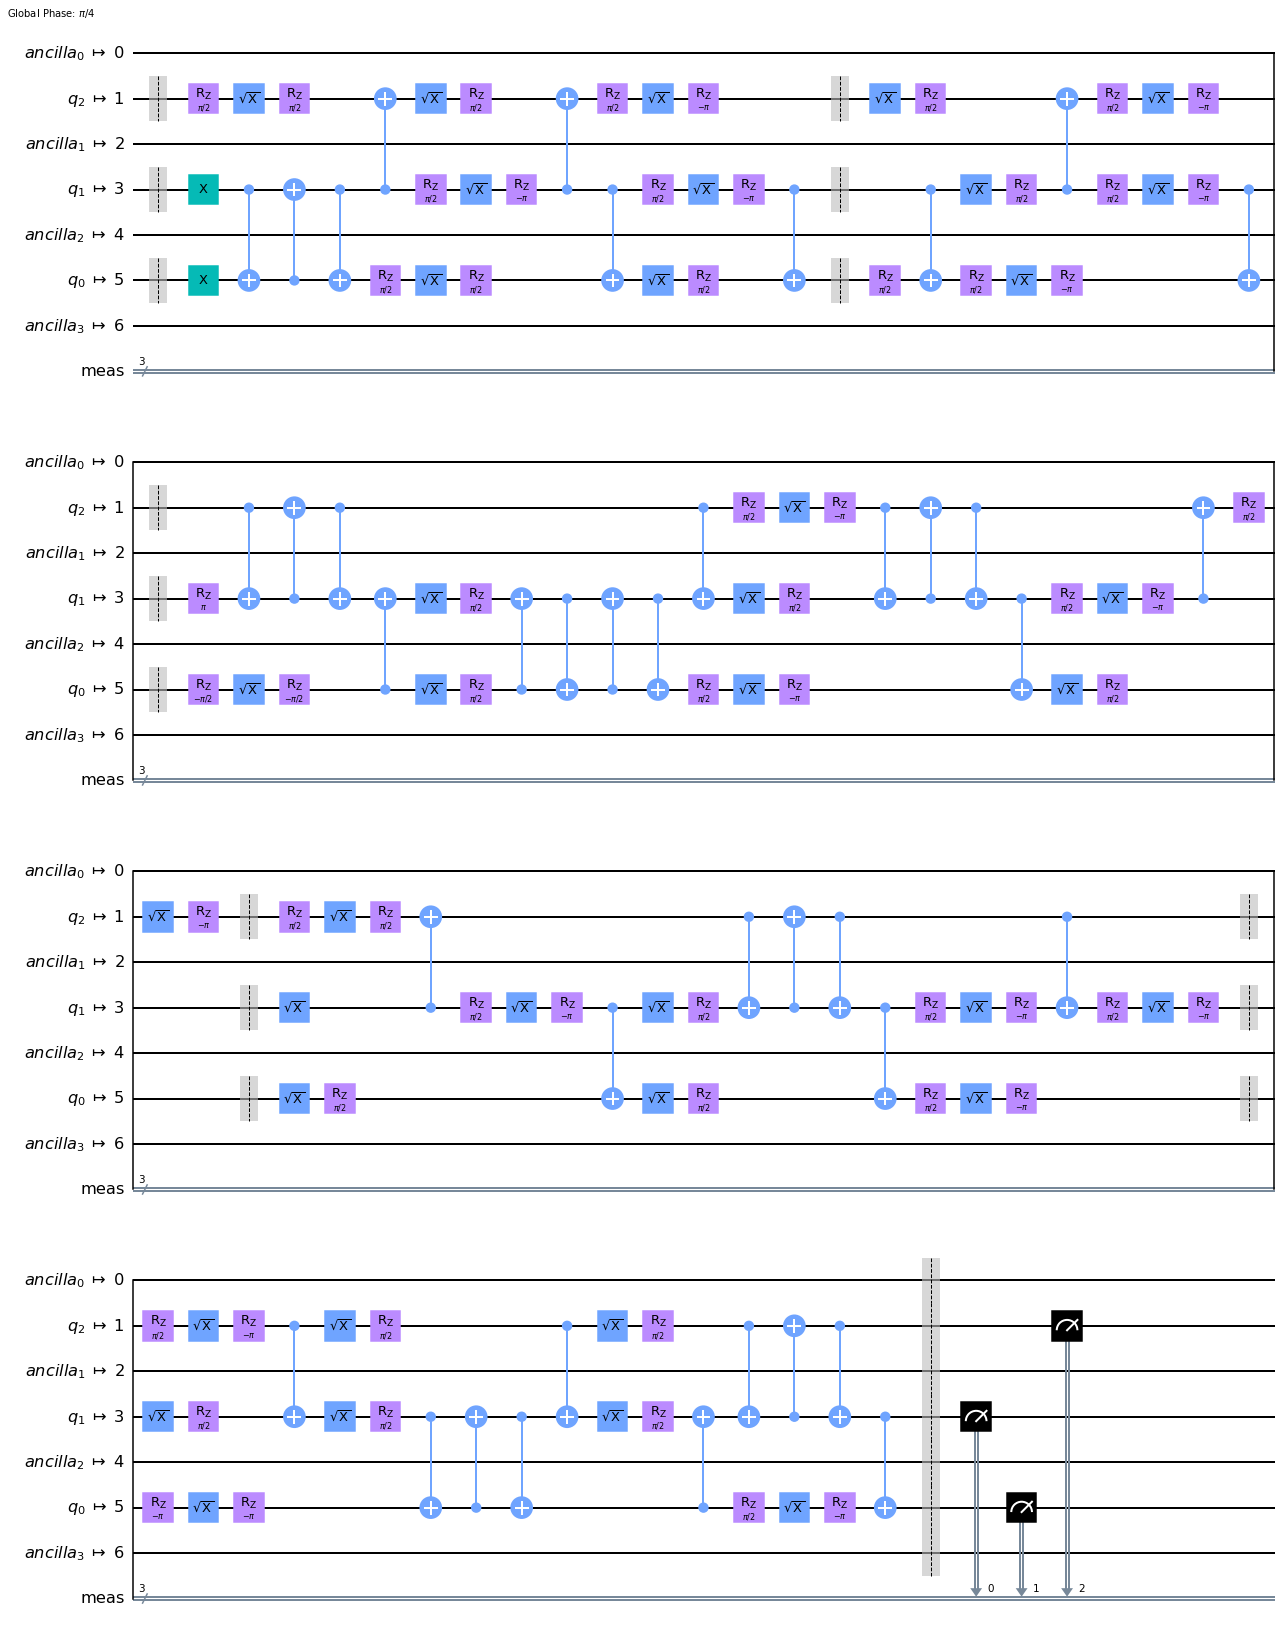

In [47]:
print(len(exp1.circuits()[1].count_ops()))
print(number_of_gates(transpile(exp1.circuits()[1],backend)))
transpile(exp1.circuits()[1],backend).draw('mpl')

7
(160, 38)


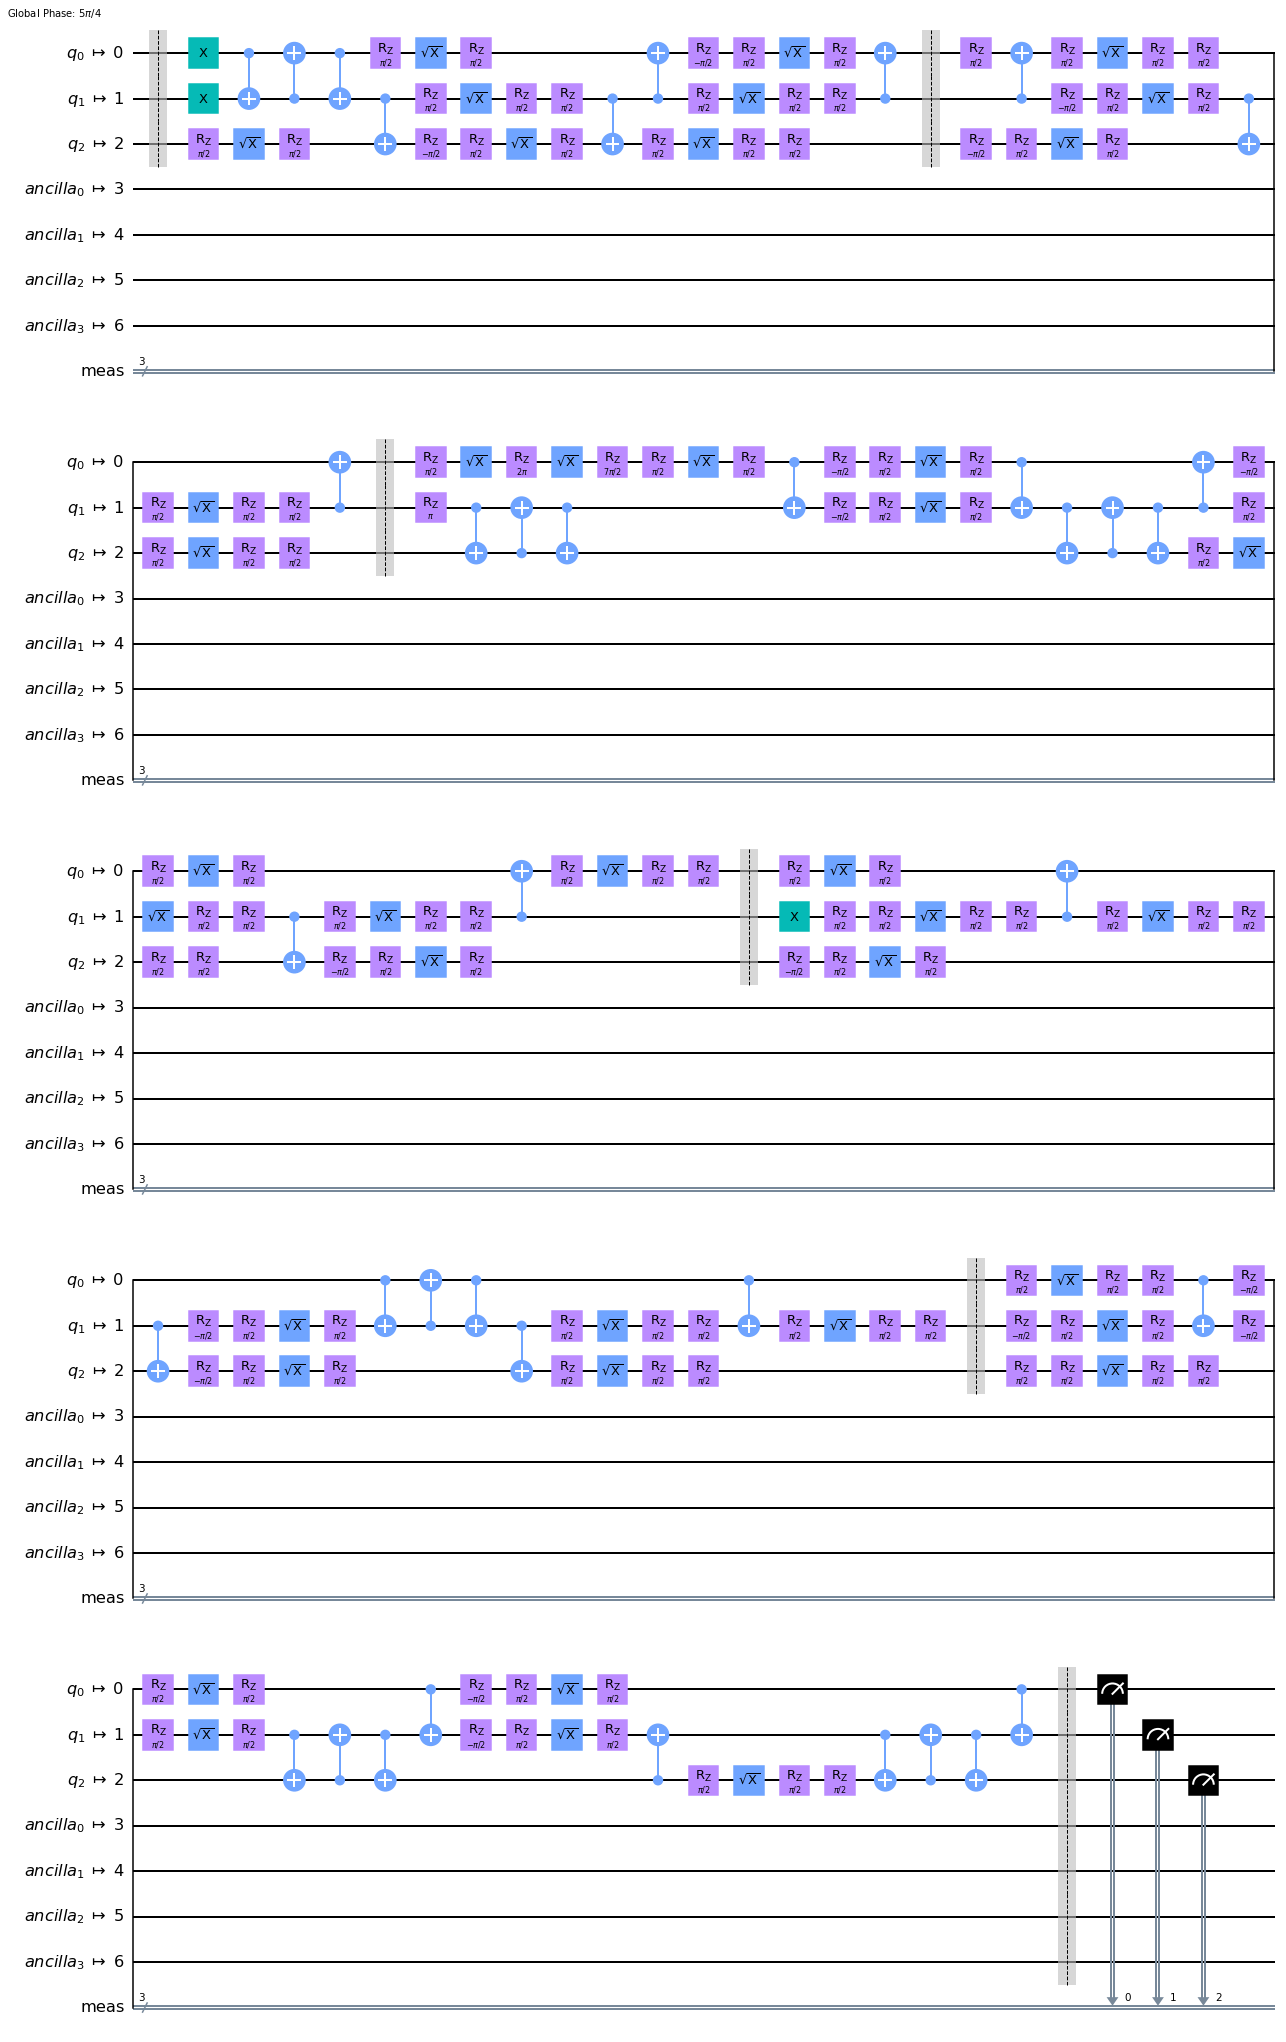

In [57]:
print(len(exp1.circuits()[1].count_ops()))
transpiled=transpile(exp1.circuits()[1],backend,optimization_level=0)
print(number_of_gates(transpiled))
transpiled.draw('mpl')

In [76]:
def expected_alpha_3Q_num(N1,N2,alpha1,alpha2) :
    return alpha1**(N1/3)*alpha2**(2*N2/3)*(1+3*alpha1**(N1/3)*alpha2**(N2/3)+3*alpha1**(2*N1/3)*alpha2**(N2/3))/7   
def number_of_gates(circuit):
    operation_count=circuit.count_ops()
    num_single_gate=0
    num_double_gate=0
    if('sx' in operation_count):
        num_single_gate+=operation_count['sx']
    if('x' in operation_count):
        num_single_gate+=operation_count['x']
    if('rz' in operation_count):
        num_single_gate+=operation_count['rz']
    if('cx' in operation_count):
        num_double_gate+=operation_count['cx']
    if('i' in operation_count):
        num_single_gate+=operation_count['i']
    return num_single_gate,num_double_gate

def expected_alpha_3Q(circuits,backend,alpha1,alpha2):
    N1=0
    N2=0
    Clifford_num=0
    for i in circuits:
        clifford_num=(len(i.count_ops())-2)
        Clifford_num+=clifford_num
        transpiled=transpile(i,backend)
       
        n1,n2=number_of_gates(transpiled)
        N1+=n1
        N2+=n2
        #print(i.count_ops())
        #print("Average "+str(n1/(clifford_num))+" single gates & "+str(n2/(clifford_num))+" cx gates")
        
    N1=N1/Clifford_num
    N2=N2/Clifford_num
    print("n1 :"+str(N1)+" n2 : "+str(N2))
    return expected_alpha_3Q_num(N1,N2,alpha1,alpha2)

In [79]:
expected_alpha_3Q(exp2.circuits(),backend,0.995,0.9996)

n1 :18.515151515151516 n2 : 8.168831168831169


0.9290600553769934

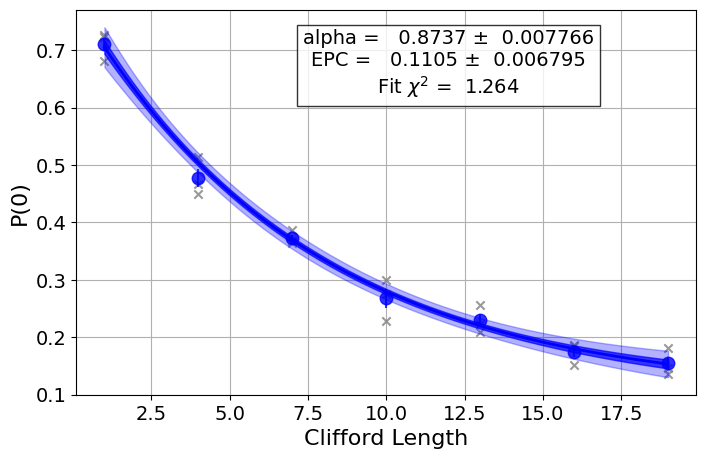

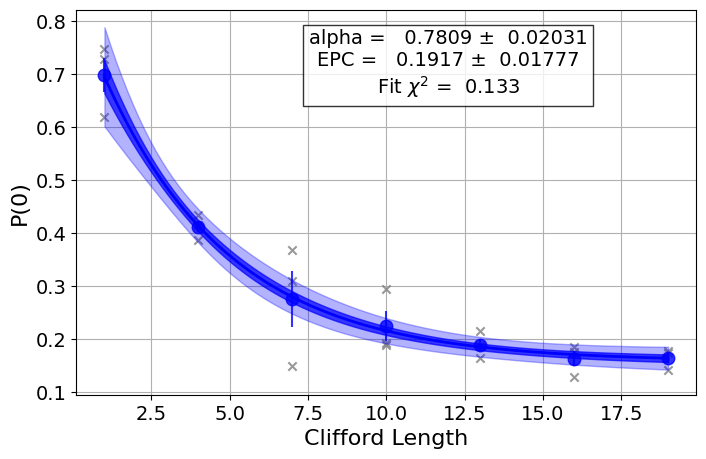

In [10]:
display(expdata1.figure(0))
display(expdata2.figure(0))